# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Luis Picón
- Nombre de alumno 2: Israel Astudillo

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/IsraPKMNPAP/Laboratorio-de-Herramientas)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento son el conjunto de datos disponibles que son utilizados por algún modelo de aprendizaje para extraer relaciones o patrones que describan alguna variable dependiente de interés. El modelo se basa en los datos de entrenamiento para generar predicciones de la variable de interés utilizando los patrones que encontró en los datos de entrenamiento. Por otro lado, los datos de validación son los utilizados para ajustar el modelo entrenado, sus hiperparámetros y revisar si cumple los estándares mínimos en primera instancia sobre un conjunto reducido de datos. El conjunto de testeo es un conjunto de datos sobre el cual el modelo ya entrenado y validado realiza predicciones de la variable dependiente, de forma de compararla luego con el valor real de esta variable y concluir sobre el desempeño general del modelo para predecir esta variable en base a métricas. Cabe destacar que estos conjuntos deben ser disjuntos entre sí para evitar sesgos dados por data leakage, es decir no queremos darle al modelo información de entrenamiento que se incluya en su testeo de forma de conocer el verdadero desempeño del modelo y caracterizar su capacidad de generalización.
2. El principal desafío al trabajar con problemas de clasificación con datos no supervisados es que al buscar agrupar datos por similaridad en sus características, los grupos encontrados pueden no ser diferenciables, identificables o interpretables y por sobre todo no se sabe a priori cuántos grupos de datos existen realmente en la data, es decir se desconoce la cantidad de clases que caracterizan a la data y es este precisamente el problema que la clasificación no supervisada busca resolver.
3. La matriz de confusión es una forma de organizar y ordenar las predicciones correctas e incorrectas que realiza un modelo. Muestra la cantidad de aciertos y desaciertos por clase, permitiendo visualizar posibles problemas tempranamente como desbalance de clases y permite caracterizar el comportamiento predicitivo del modelo en base a las predicciones que realiza. Se usa como base para construir las distintas métricas de evaluación de modelos que representan razones entre predicciones correctas o incorrectas por sobre las totales para cierta clase o en general, dependiendo de la métrica.
4. Se considerará la fórmula para el caso de clasificación binaria por simplicidad, donde TP son los verdaderos positivos, TN los verdaderos negativos, FP los falsos positivos y FN los falsos negativos. El Accuracy que viene dado por: 
$$\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}$$
Representa el porcentaje de aciertos que el modelo tuvo respecto al total de predicciones que realizó.

El Precision viene dado por:
$$\text{Precision}=\frac{TP}{TP+FP}$$
Representa el porcentaje de aciertos positivos que el modelo realizó, es decir del total de positivos que predijo cuantos realmente eran positivos.

El Recall viene dado por:
$$\text{Recall}=\frac{TP}{TP+FN}$$
Representa el porcentaje de clasificaciones positivas correctas del total de elementos con clase positiva. Es decir, de todos los elementos de clases positiva, cuantos identificó correctamente el modelo.

El F1-Score viene dado por:
$$\text{F1-Score}=2\cdot\frac{\text{Precision}\cdot\text{Recall}}{\text{Precision}+\text{Recall}}$$
Representa una media armónica entre el Precision y Recall, de forma que enterega un equilibrio entre el desempeño del modelo para ambas de estas métricas.
5. La métricas recomendadas para los casos mostrados son:
- Considerando que el matenimiento predictivo de fallas en la maquinaria busca reducir el tiempo de inactividad operacional por fallas y suponiendo que prepararse para una falla y que no haya falla implica un menor costo que remendar la falla una vez ocurre, preferimos que hayan falsos positivos sobre falsos negativos. Es decir, preferimos que nuestro modelo sobre prediga fallas de forma que tienda a reportar más fallas de las que ocurren, de forma de minimizar las fallas imprevistas que son muy costosas. En este sentido la métrica recomendada es el recall que mide exactamente esto y penaliza por falsos negativos, es decir cuando el modelo dice que no hay falla pero realmente si hay.
- Para la detección de enfermedades altamente contagiosas preferimos siempre estar lo más conscientes posibles de la cantidad de enfermos. Es decir, nos gustaría que nuestro modelo prediga más personas enfermas que no enfermas. Así es necesario exigir al modelo tener pocos falsos negativos, es decir pocos casos que el modelo dice que no están enfermos pero en realidad si lo estaban. Nuevamente la métrica que penaliza por falsos negativos y es recomendada es el Recall.
- Para aprobar créditos de alto riesgo, nos gustaría maximizar la probabilidad de pago del crédito del cliente. Para este objetivo el modelo debe aprobar créditos cuando la probabilidad de pago es relativamente alta. En ese sentido, si el modelo no aprueba un crédito para un cliente con probabilidad alta de pago o realiza un falso negativo, la pérdida del banco en este caso no es tan alta dado que pierde principalmente la oportunidad de ofrecer el crédito. POr otro lado, si el modelo aprueba el crédito para un cliente muy riesgoso que finalmente incurre en impago, el costo para el banco de este error es el del valor del crédito y en definitiva es un costo mayor. En ese sentido nos gustaría un modelo que tenga pocos falsos positivos o que otorgue el crédito siendo que la persona no pagará. Una métrica adecuada que penaliza por este valor es el Precision, que es la métrica recomendada.
- Para detectar crímines podemos nuevamente evaluar el costo de cometer errores de predicción, en este caso predecir que una persona realizó un crimen cuando no lo hizo tiene un costo alto o es una acusación grave de hacer, por otro lado predecir que una persona no realizó un crimen cuando si lo hizo deja en impunidad este crimen y es también algo de relevancia para el modelo. En este sentido, una métrica recomendable es el F1-Score que encuentra un balance entre Precision y Recall que sería este caso, donde no queremos priorizar una mala clasificación por sobre otra.
6. La calibración de modelos se utiliza para ajustar la probabilidad de clases que entregan las predicciones del modelo de forma que se ajusten a la probabilidad de clases real que se observa en los datos. Se usa para regularizar la salida de modelos de aprendizaje en general, sobre la distribución de datos predichos como un conjunto. Muchos modelos no tienen este tipo de regularización agregada naturalmente como XGBoost, sin embargo hay otros que si tienen esta consideración como regresión logística.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [54]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [55]:
# Paquetes a utilizar
# Clásicos
import pandas as pd
import numpy as np

In [56]:
data = pd.read_csv("../temp/stats_players.csv")
data.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [57]:
# 1.
# Creación de columna
data["label"] = data["National_Position"].apply(lambda x:1 if pd.notna(x) and x.strip() != '' else 0)
# 2.
# Ejemplos por clase
print("Cantidad de seleccionados nacionales:",data["label"].value_counts()[1])
print("Cantidad de no seleccionados nacionales:",data["label"].value_counts()[0])
print("Proporción clase 1 respecto a clase 0:",data["label"].value_counts()[1]/data["label"].value_counts()[0])
# Se observa un desbalance de clases, donde un porcentaje menor de los jugadores son jugadores seleccionados
# mientras que la mayoría son no seleccionados.
# 3. y 4.
# ColumnTransformer
from sklearn.compose import ColumnTransformer
# Utilizamos RobustScaler, dado que asumir distribución normal sobre las 31 columnas numéricas pueden ser
# inadecuado. MinMaxScaler puede ser susceptible a outliers que según el reporte no se aprecian en los histogramas
# pero no hemos aún confirmado si hay o no.
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
# Utilizamos OneHotEncoder para las variables categóricas que no son identificadores como el nombre y que no son National_Position
# dado que construimos la etiqueta con esta columna. Las columnas categóricas a incluir pueden en su mayoría ser descompuestas en
# pocas variables binarias por onehot, salvo por el país. Luego podemos reevaluar esta decisión.
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fuera de la variable National_Position, del reporte vemos que Club_Position tiene 1 valor faltante. Por esto necesitamos un imputador.
# Utilizamos uno simple para pocos casos y de poco impacto que se asegure de que no hay nulos para ninguna variable, creamos uno por 
# tipo de variable.
from sklearn.impute import SimpleImputer
sim_imp_cat = SimpleImputer(strategy="most_frequent")
sim_imp_num = SimpleImputer(strategy="mean")


# Definimos las columnas a transformar
categorical_columns = data.select_dtypes(include=['object', 'category']).drop(['Name', 'National_Position'], axis=1).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).drop(['label'],axis=1).columns.tolist()

# Pipelines separados por variable 
from sklearn.pipeline import Pipeline
cat_pipe = Pipeline([
    ('Imputer_mode',sim_imp_cat),
    ('OneHotEncoder',one_hot)
])
num_pipe = Pipeline([
    ('Imputer_mean',sim_imp_num),
    ('RobustScaler',robust_scaler)
])
# ColumnTransformer
col_transformer = ColumnTransformer([
    ("Categorical Transformation",cat_pipe,categorical_columns),
    ("Numerical Transformation",num_pipe,numerical_columns)
])

Cantidad de seleccionados nacionales: 1075
Cantidad de no seleccionados nacionales: 16513
Proporción clase 1 respecto a clase 0: 0.06510022406588749


### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [58]:
# 1. Separamos la data
from sklearn.model_selection import train_test_split
# Ajustamos la data que nos interesa para el entrenamiento
X = data.drop(['Name','National_Position','label'],axis=1)
y = data['label']

# Separamos aleatoriamente con mantención de proporción de clases y seleccionamos un 20% como test arbitrariamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30,stratify=y)
# 2. Pipeline XGBoost
# Importamos
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Instanciamos los clasificadores
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()

# Creamos la instancia
pipeline_xgboost = Pipeline([
    ('Column_Transformer',col_transformer),
    ('xgb_classifier',xgb_model)
])
pipeline_lightgbm = Pipeline([
    ('Column_Transformer',col_transformer),
    ('lgbm_classifier',lgbm_model)
])
# 3. Entrenamos
y_pred_xgboost = pipeline_xgboost.fit(X_train, y_train)
y_pred_lgbm = pipeline_lightgbm.fit(X_train, y_train)
y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lgbm = pipeline_lightgbm.predict(X_test)


[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2649
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [59]:
# 1. 
# Importamos
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
# XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost, average=None)
recall_xgboost = recall_score(y_test, y_pred_xgboost, average=None)
f1_xgboost = f1_score(y_test, y_pred_xgboost, average=None)
cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)
report_xgboost = classification_report(y_test, y_pred_xgboost)
print("Métricas de desempeño XGBoost:")
print("Accuracy:",accuracy_xgboost)
print("Precisión para la clase 1:",precision_xgboost[1])
print("Recall para la clase 1:",recall_xgboost[1])
print("F1-Score para la clase 1:",f1_xgboost[1])
print("Matriz de Confusión:")
print(cm_xgboost)
print("Clasification Report:")
print(report_xgboost)
# LightGBM
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average=None)
recall_lgbm = recall_score(y_test, y_pred_lgbm, average=None)
f1_lgbm = f1_score(y_test, y_pred_lgbm, average=None)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)
print("Métricas de desempeño LGBM:")
print("Accuracy:",accuracy_lgbm)
print("Precisión para la clase 1:",precision_lgbm[1])
print("Recall para la clase 1:",recall_lgbm[1])
print("F1-Score para la clase 1:",f1_lgbm[1])
print("Matriz de Confusión:")
print(cm_lgbm)
print("Clasification Report:")
print(report_lgbm)

Métricas de desempeño XGBoost:
Accuracy: 0.9499715747583855
Precisión para la clase 1: 0.6611570247933884
Recall para la clase 1: 0.37209302325581395
F1-Score para la clase 1: 0.47619047619047616
Matriz de Confusión:
[[3262   41]
 [ 135   80]]
Clasification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.66      0.37      0.48       215

    accuracy                           0.95      3518
   macro avg       0.81      0.68      0.72      3518
weighted avg       0.94      0.95      0.94      3518

Métricas de desempeño LGBM:
Accuracy: 0.9502558271745309
Precisión para la clase 1: 0.6666666666666666
Recall para la clase 1: 0.37209302325581395
F1-Score para la clase 1: 0.47761194029850745
Matriz de Confusión:
[[3263   40]
 [ 135   80]]
Clasification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.67      0.37  

2. De las métricas entregadas, vemos que se tiene un accuracy alto lo cual quiere decir que el total de predicciones que hace el modelo son en su mayoría correctas sin distinguir por clase. Sin embargo, si nos fijamos en la clase 1 minoritaria se tienen métricas muy menores a lo que se esperaría de un accuracy alto y de las métricas para la clase 0, lo cual se debe al desbalance de clases. En primer lugar, el precision para ambos casos es de aproximadamente 0.66, es decir de todas las predicciones de 1 que realizó el modelo solo acerto 2/3 de ellas aproximadamente. El recall de 0.37 indica que de los valores con etiqueta 1 real, el modelo predice correctamente solo un 37% lo cual es desalentador. La cantidad de elementos de la clase minoritaria hace que los modelos sean menos potentes para detectar a la clase minoritaria lo cual es reflejado por el precision y recall de la clase 1. Cabe mencionar que F1-Score es cercano a 1/2 y el promedio armónico de ambas métricas descritas es bajo y hay un mal desempeño en general.
3. La mejor métrica en el caso de que nuestro objetivo sea predecir si un jugador es o no seleccionado nacional primero debe ser respecto a la clase 1, es decir evaluamos qué tan bueno es el modelo para predecir la clase minoritaria que es de interés. La métrica podemos recomendarla acorde al costo que significaría tener un falso positivo (Precision) o falso negativo (Recall). En este caso no hay un costo específico asociado a privilegiar uno sobre el otro especialmente, pero si buscamos una métrica que considere ambos para predecir mejor la clase minoritaria. Por esto la métrica recomendada es el F1-Score que encuentra el balance entre ambas métricas y considera ambos efectos.
Finalmente, ambos modelos se comportan muy similarmente y no hay una diferencia sustancial que valga la pena destacar. Solo LGBM clasifica un ejemplo de la clase 0 corectamente más que XGBoost, pero no necesariamente puede deberse a que un modelo es mejor que el otro basados solo en ese elemento. En ese sentido, ambos modelos se desempeñan de igual forma.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [60]:
# Diccionario que mapea las posiciones a las etiquetas correspondientes
posicion_dict = {
    'ST': 'ataque', 'CF': 'ataque',
    'RW': 'central_ataque', 'CAM': 'central_ataque', 'LW': 'central_ataque',
    'RM': 'central', 'CM': 'central', 'LM': 'central',
    'RWB': 'central_defensa', 'CDM': 'central_defensa', 'LWB': 'central_defensa',
    'RB': 'defensa', 'CB': 'defensa', 'LB': 'defensa',
    'GK': 'arquero'
}

# Mapeamos
df_labeled = data.copy()
df_labeled['label'] = df_labeled['Club_Position'].map(posicion_dict)

# Filtrar los valores no deseados: 'Sub' y 'Res'
df_labeled = df_labeled[~df_labeled['Club_Position'].isin(['Sub', 'Res'])]

print(df_labeled[['Name', 'Club_Position', 'label']].head())

                Name Club_Position           label
0  Cristiano Ronaldo            LW  central_ataque
1       Lionel Messi            RW  central_ataque
2             Neymar            LW  central_ataque
3        Luis Suárez            ST          ataque
4       Manuel Neuer            GK         arquero


In [61]:
# Contamos el número de jugadores por clase
conteo_clases = df_labeled['label'].value_counts()
print(conteo_clases)

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Definimos aquellas características que son propias de las habilidades del jugador, dejando fuera caraterísticas que no reflejan habilidad
X = df_labeled[['Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
                'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure',
                'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina',
                'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power',
                'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']]

y = df_labeled['label']

# Dividimos en conjunto de entrenamiento y prueba
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
# Calculamos el porcentaje de valores faltantes en y_train
porcentaje_nan_y_train = dfy_train.isna().mean()
print(porcentaje_nan_y_train)

# Verificar valores únicos en y_test
print(dfy_test.unique())

# Notamos que existen valores Nan en y_test, por lo que los eliminamos y nos aseguramos de eliminar los mismos registrospara x_test
X_test_clean = dfX_test[~dfy_test.isna()]
y_test_clean = dfy_test.dropna()

# Eliminamos filas con valores NaN en y_train y los correspondientes en X_train
X_train_clean = dfX_train[~dfy_train.isna()]  
y_train_clean = dfy_train.dropna()         

# Verificamos que ambos tengan el mismo número de muestras
print(X_train_clean.shape, y_train_clean.shape)

# Creamos el pipeline con estandarización y SGDClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(random_state=42))
])

# Entrenamos el modelo
pipeline.fit(X_train_clean, y_train_clean)

# Hacemos la predicción sobre el conjunto de prueba
y_pred = pipeline.predict(X_test_clean)

# Evaluamos el rendimiento
print("Accuracy:", accuracy_score(y_test_clean, y_pred))
print("\nClassification Report:\n", classification_report(y_test_clean, y_pred))

0.43103802672147995
[nan 'central' 'central_ataque' 'arquero' 'ataque' 'defensa'
 'central_defensa']
(2768, 28) (2768,)
Accuracy: 0.7301451750640479

Classification Report:
                  precision    recall  f1-score   support

        arquero       1.00      0.99      0.99       188
         ataque       0.81      0.83      0.82       144
        central       0.59      0.42      0.49       251
 central_ataque       0.42      0.61      0.50       179
central_defensa       0.50      0.02      0.04        55
        defensa       0.85      0.94      0.89       354

       accuracy                           0.73      1171
      macro avg       0.69      0.64      0.62      1171
   weighted avg       0.73      0.73      0.71      1171



A partir de los pasos a seguir indicados en la guía, escogemos el método SGDClassifier para la clasificación, esto debido a que estamos prediciendo una categoría y nuestro dataset tiene más de 100000 datos.

Con respecto a los resultados obtenidos, notamos que hay un buen rendimiento con respecto a las predicciones para arquero y defensa (alta precisión y recall). Por otro lado, vemos que al modelo se le dificulta hacer la clasificación para las posiciones intermedias (central y central_defensa), esto puede ser debido, posiblemente a que las características de los jugadores en estas posiciones son más similares entre sí o hay menos ejemplos para entrenar.

En general, considerando el accuracy, vemos que el 73% de las predicciones del modelo son correctas, lo cual es aceptable, pero no excelente.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] 

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [66]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

#Continuar código aquí

# Configuramos entorno de PyCaret para clasificación
clf = setup(data, target='label', fold=5)

# Comparar los modelos de árbol
best_model = compare_models(include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'])

# Evaluar el mejor modelo
evaluate_model(best_model)

# Obtener las métricas más detalladas
print(best_model)


,Description,Value
0,Session id,8265
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 40)"
4,Transformed data shape,"(17588, 48)"
5,Transformed train set shape,"(12311, 48)"
6,Transformed test set shape,"(5277, 48)"
7,Numeric features,33
8,Categorical features,6
9,Rows with missing values,93.9%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9598,0.6757,0.3521,0.7846,0.4850,0.4723,0.5134,0.1020
et,Extra Trees Classifier,0.9487,0.9046,0.1687,0.9449,0.2840,0.2710,0.3847,0.1880
lightgbm,Light Gradient Boosting Machine,0.9485,0.6230,0.1636,0.7718,0.2478,0.2389,0.3121,0.2520
rf,Random Forest Classifier,0.9465,0.9366,0.1301,0.9119,0.2214,0.2109,0.3205,0.2760
catboost,CatBoost Classifier,0.9384,0.8715,0.0000,0.0000,0.0000,-0.0010,-0.0050,2.0860
xgboost,Extreme Gradient Boosting,0.9383,0.8087,0.0000,0.0000,0.0000,-0.0011,-0.0053,0.1660


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=8265, splitter='best')


En términos de reducir la cantidad de falsos positivos, notamos que el modelo que muestra un mejor rendimiento en este aspecto es el modelo 'Random Forest Classifier' con un Precision de 0.93 (métrica quemide qué proporción de las predicciones positivas hechas por el modelo son verdaderamente correctas). además de ser el modelo con mejor rendimiento en términos de velocidad (TT(sec) = 0.17), por lo que Decision Tree Classifier sería el modelo de árbol más adecuado.Además, es el cuarto modelo con mejor rendimiento en términos de velocidad (TT(sec) = 0.45), por lo que rf sería el modelo de árbol más adecuado.



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9533,0.9401,0.2384,1.0000,0.3850,0.3702,0.4766
1,0.9423,0.9340,0.0667,0.8333,0.1235,0.1155,0.2260
2,0.9484,0.9414,0.1667,0.9259,0.2825,0.2689,0.3808
3,0.9403,0.9198,0.0267,0.8000,0.0516,0.0479,0.1394
4,0.9480,0.9477,0.1523,1.0000,0.2644,0.2522,0.3799
Mean,0.9465,0.9366,0.1301,0.9119,0.2214,0.2109,0.3205
Std,0.0047,0.0095,0.0752,0.0830,0.1190,0.1150,0.1210


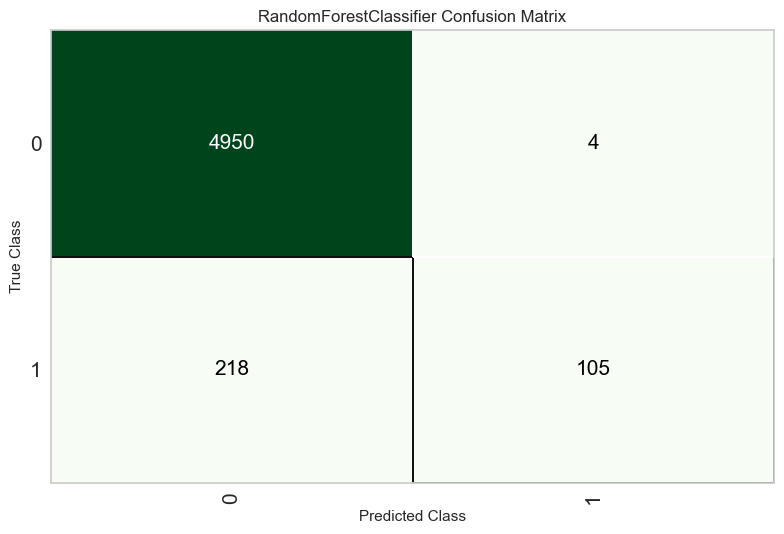

In [67]:
rf = create_model('rf')
plot_model(rf, plot='confusion_matrix')


Al observar la matriz, vemos que la cantidad de verdadeos negativos es la cantidad predicha más alta de todas, lo cual indica la eficiencia del modelo a la hora de reducir los falsos positivos, sin embargo, notamos que con respecto a los verdaderos positivos, el modelo no es tan eficiente ya que existen muchos más falsos negativos que verdaderos positivos.

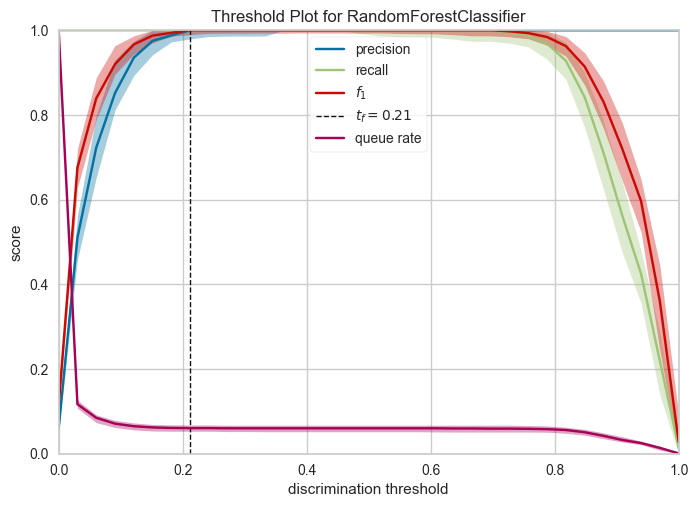

In [68]:
plot_model(rf, plot='threshold')


Notamos que el umbral por defecto muestra buenos resultados con respecto a las métricas del modelo rf.

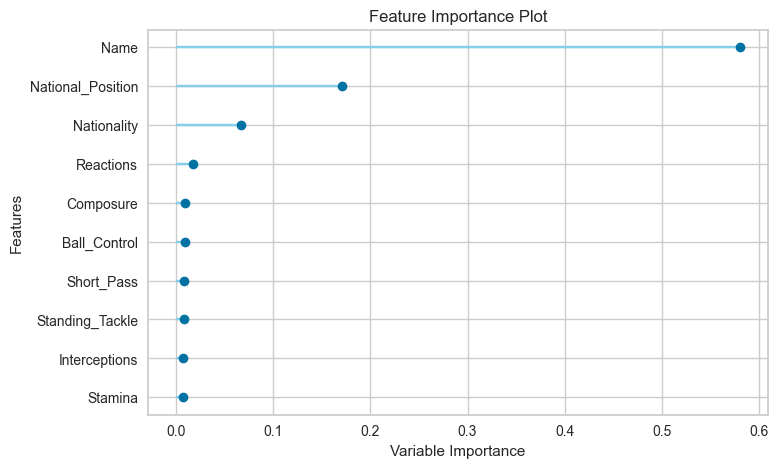

In [69]:
plot_model(rf, plot='feature')


Notamos que las variables 'Name', 'National_Position' y 'Nationality' son las variables que el modelo a tomado para tomar decisiones.
Con respecto a la variable 'Name' debemos de tener cuidado ya que al no estar transformada en un identificador, el modelo podría estar aprendiendo patrones erroneos en los nombres.Por otro lado, tanto 'National_Position' como 'Nationality' son variables que en este contexto tienen un fuerte poder predictivo, ya que el este deporte, la posición y la nacionalidad pueden ser indicativos de estilo de juego, formación recibida,etc.

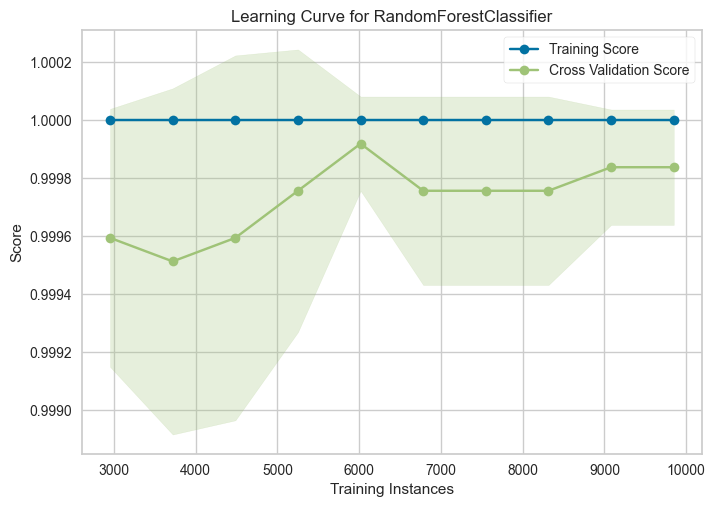

In [70]:
plot_model(rf, plot='learning')


Al visualizar la curva de aprendizaje notamos que, a medida que aumentas la cantidad de datos utilizados, se obtienen mejores resultados en el conjunto de testeo, sin embargo, notamos que las curvas no tienden al mismo punto,la curva de rendimiento del cross validation se queda por debajo de la curva de training, esto significa que el modelo no esta siendo capaz de ajustarse y predecir correctamente la totalidad de los registros para testing, esto se debe a un claro desbalance de clases, donde ya vimos que la proporción de la clase positiva respecto a clase negativa es de 0.065.Sin ambargo, la diferencia es mínima entre la curva de training y de test, por lo que podemos decir, que si bien, el rendimiento en testing no es perfecto, si es bastante aceptable

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [71]:
# Consideramos el modelo XGBoost entrenado en la primera parte

y_xgboost = pipeline_xgboost.fit(X_train, y_train)


### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**